In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\gitan\OneDrive\Documents\Desktop\DS\sentiment-analyzer\data\youtubecomment.csv")
print("Shape:", df.shape)
df.head()

Shape: (18408, 2)


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [4]:
df.info()
df.describe(include="all")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


Comment      44
Sentiment     0
dtype: int64

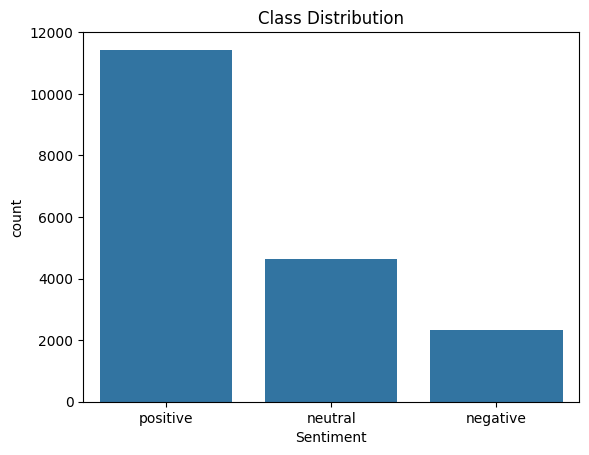

In [5]:
sns.countplot(x="Sentiment", data=df, order=df['Sentiment'].value_counts().index)
plt.title("Class Distribution")
plt.show()

count    18408.000000
mean       177.136897
std        250.894504
min          2.000000
25%         66.000000
50%        113.000000
75%        201.000000
max       7847.000000
Name: length, dtype: float64


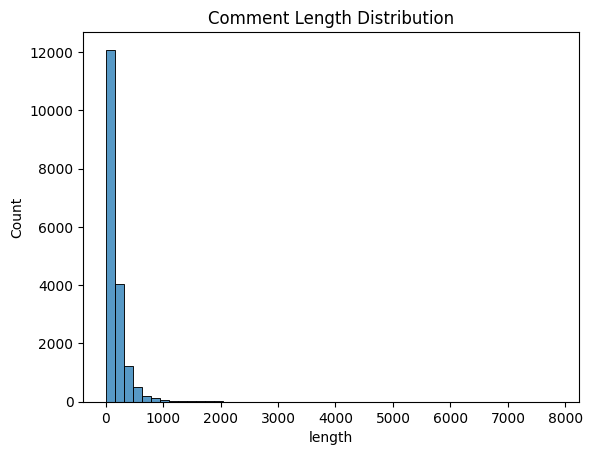

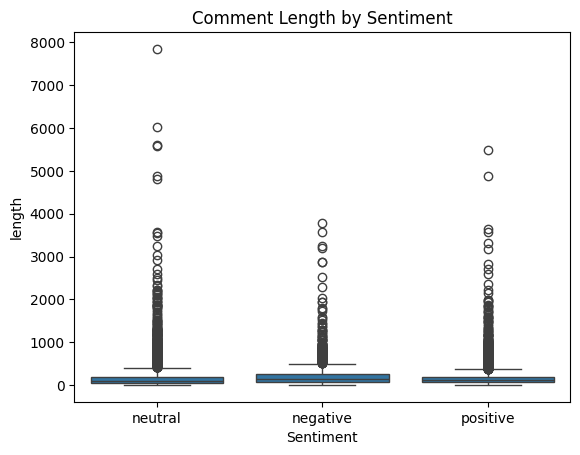

In [6]:
df["length"] = df["Comment"].astype(str).apply(len)

print(df["length"].describe())

sns.histplot(df["length"], bins=50)
plt.title("Comment Length Distribution")
plt.show()

sns.boxplot(x="Sentiment", y="length", data=df)
plt.title("Comment Length by Sentiment")
plt.show()

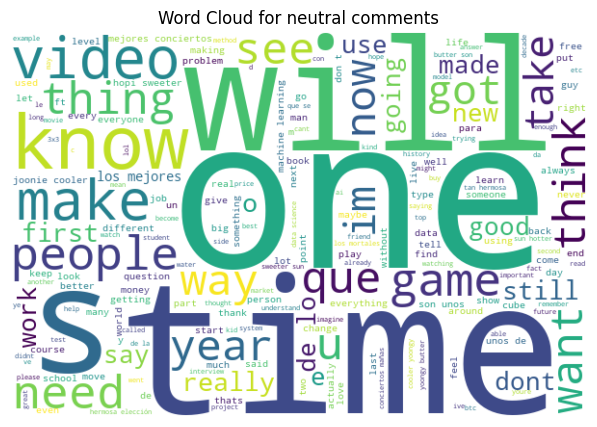

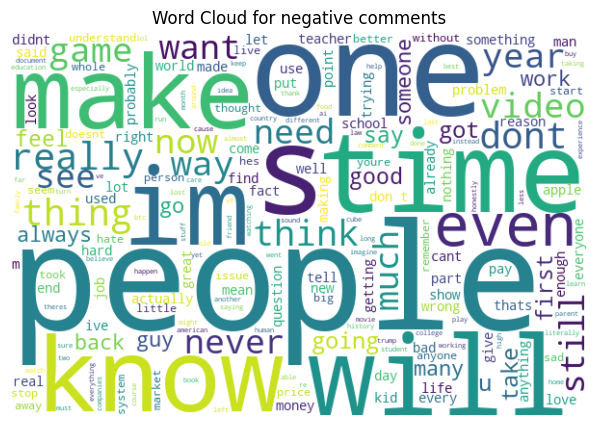

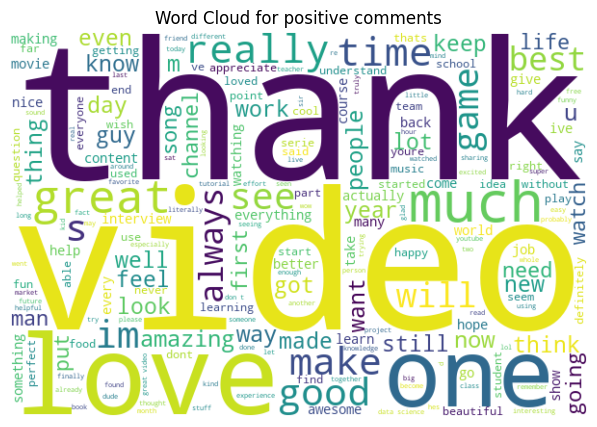

In [7]:
from wordcloud import WordCloud

for label in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == label]['Comment'].astype(str))
    wc = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {label} comments")
    plt.show()